In [1]:
import pandas as pd

# Dosyayı oku
file_path = 'italy_earthquake.csv'
data = pd.read_csv(file_path)

# İlk birkaç satırı görüntüle
print(data.head())

# Veri çerçevesinin genel bilgilerini görüntüle
print(data.info())


                      Time  Latitude  Longitude  Depth/Km  Magnitude
0  2016-08-24 03:36:32.000   42.6983    13.2335       8.1        6.0
1  2016-08-24 03:37:26.580   42.7123    13.2533       9.0        4.5
2  2016-08-24 03:40:46.590   42.7647    13.1723       9.7        3.8
3  2016-08-24 03:41:38.900   42.7803    13.1683       9.7        3.9
4  2016-08-24 03:42:07.170   42.7798    13.1575       9.7        3.6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8086 entries, 0 to 8085
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       8086 non-null   object 
 1   Latitude   8086 non-null   float64
 2   Longitude  8086 non-null   float64
 3   Depth/Km   8086 non-null   float64
 4   Magnitude  8086 non-null   float64
dtypes: float64(4), object(1)
memory usage: 316.0+ KB
None


Eksik Veriler:
 Time         0
Latitude     0
Longitude    0
Depth/Km     0
Magnitude    0
dtype: int64

Verinin Özeti:

          Latitude    Longitude     Depth/Km    Magnitude
count  8086.000000  8086.000000  8086.000000  8086.000000
mean     42.829557    13.161034     9.968328     2.398368
std       0.125927     0.083058     2.194064     0.426381
min      41.581300    12.537700     0.200000     2.000000
25%      42.751350    13.103200     8.900000     2.100000
50%      42.821800    13.160700     9.900000     2.300000
75%      42.911000    13.215650    10.800000     2.600000
max      43.927300    13.852500    47.900000     6.500000


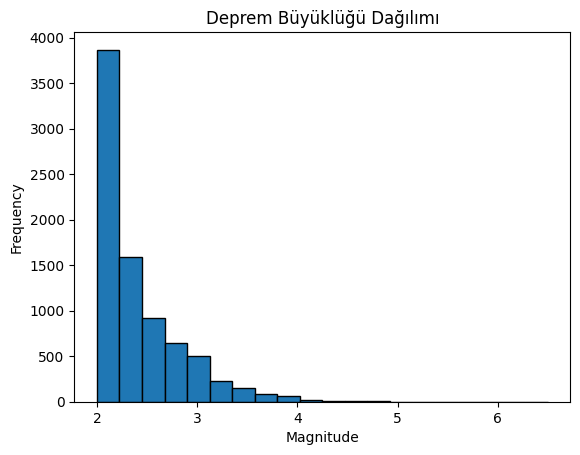

In [2]:
# Eksik verileri kontrol et
missing_values = data.isnull().sum()
print("Eksik Veriler:\n", missing_values)

# Veriyi özetle
print("\nVerinin Özeti:\n")
print(data.describe())

# Deprem büyüklüklerinin dağılımını görselleştir (isteğe bağlı)
import matplotlib.pyplot as plt

if 'Magnitude' in data.columns:
    plt.hist(data['Magnitude'], bins=20, edgecolor='black')
    plt.title('Deprem Büyüklüğü Dağılımı')
    plt.xlabel('Magnitude')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Magnitude sütunu bulunamadı.")


In [4]:
# Örnek veri temizleme ve seçim
# Gerekli sütunları seçelim
columns_to_keep = ['Time', 'Latitude', 'Longitude', 'Depth/Km', 'Magnitude']
filtered_data = data[columns_to_keep]

# Eksik verileri kontrol edip, eksik satırları temizleme
cleaned_data = filtered_data.dropna()

# Tarih formatını düzenleme (eğer 'Time' sütunu varsa)
if 'Time' in cleaned_data.columns:
    cleaned_data['Time'] = pd.to_datetime(cleaned_data['Time'])
    print("Tarih sütunu dönüştürüldü.")
else:
    print("Time sütunu bulunamadı.")

# Büyüklüğe dayalı kategoriler ekleme (isteğe bağlı)
if 'Magnitude' in cleaned_data.columns:
    conditions = [
        (cleaned_data['Magnitude'] < 4.0),
        (cleaned_data['Magnitude'] >= 4.0) & (cleaned_data['Magnitude'] < 6.0),
        (cleaned_data['Magnitude'] >= 6.0)
    ]
    categories = ['Low', 'Moderate', 'High']
    cleaned_data['Magnitude Category'] = pd.cut(cleaned_data['Magnitude'], bins=[-float('inf'), 4, 6, float('inf')], labels=categories)
    print("Magnitude kategorileri oluşturuldu.")
else:
    print("Magnitude sütunu bulunamadı.")

# Temizlenmiş veriyi inceleyelim
print("\nTemizlenmiş Veri İlk 5 Satır:\n", cleaned_data.head())


Tarih sütunu dönüştürüldü.
Magnitude kategorileri oluşturuldu.

Temizlenmiş Veri İlk 5 Satır:
                      Time  Latitude  Longitude  Depth/Km  Magnitude  \
0 2016-08-24 03:36:32.000   42.6983    13.2335       8.1        6.0   
1 2016-08-24 03:37:26.580   42.7123    13.2533       9.0        4.5   
2 2016-08-24 03:40:46.590   42.7647    13.1723       9.7        3.8   
3 2016-08-24 03:41:38.900   42.7803    13.1683       9.7        3.9   
4 2016-08-24 03:42:07.170   42.7798    13.1575       9.7        3.6   

  Magnitude Category  
0           Moderate  
1           Moderate  
2                Low  
3                Low  
4                Low  


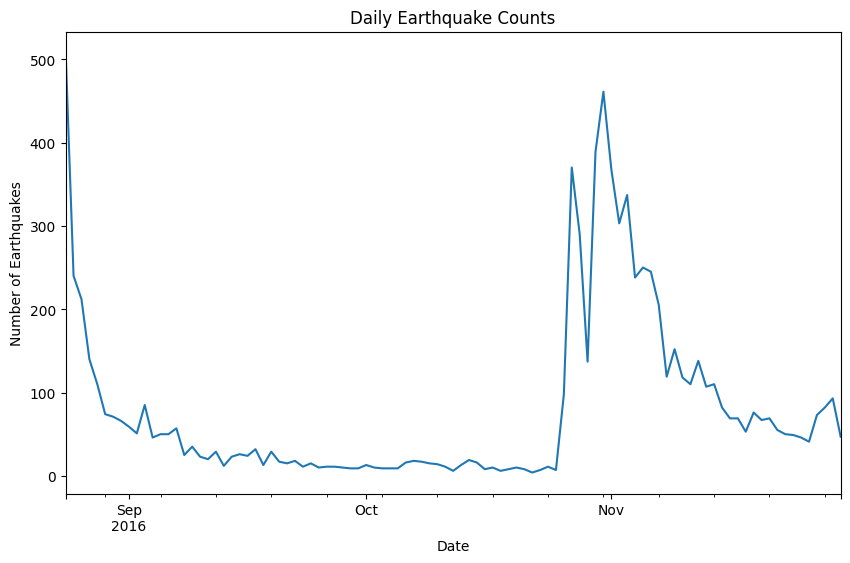

In [5]:
# Zaman bazlı deprem dağılımını görselleştirme
if 'Time' in cleaned_data.columns:
    cleaned_data.set_index('Time', inplace=True)
    cleaned_data.resample('D').size().plot(title="Daily Earthquake Counts", figsize=(10, 6))
    plt.xlabel("Date")
    plt.ylabel("Number of Earthquakes")
    plt.show()
else:
    print("Time sütunu bulunamadığı için zaman analizi yapılamadı.")


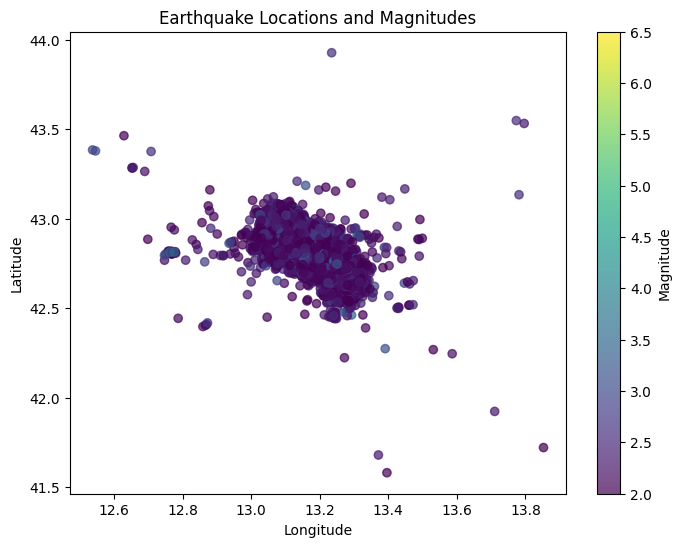

In [6]:
# Harita üzerinde deprem yoğunluğu
import matplotlib.pyplot as plt

if 'Latitude' in cleaned_data.columns and 'Longitude' in cleaned_data.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(cleaned_data['Longitude'], cleaned_data['Latitude'],
                c=cleaned_data['Magnitude'], cmap='viridis', alpha=0.7)
    plt.colorbar(label='Magnitude')
    plt.title('Earthquake Locations and Magnitudes')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
else:
    print("Latitude ve Longitude sütunları bulunamadığı için coğrafi analiz yapılamadı.")


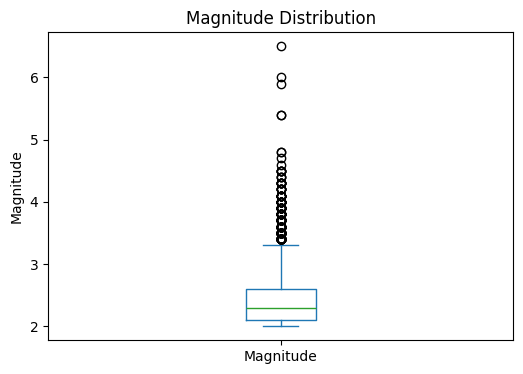

In [7]:
# Büyüklük dağılımını analiz etme
if 'Magnitude' in cleaned_data.columns:
    cleaned_data['Magnitude'].plot(kind='box', title="Magnitude Distribution", figsize=(6, 4))
    plt.ylabel("Magnitude")
    plt.show()
else:
    print("Magnitude sütunu bulunamadı.")


In [8]:
# Rapor oluşturma
report_path = "/content/drive/MyDrive/Colab Notebooks/database/italy_earthquake/earthquake_analysis_report.txt"

with open(report_path, 'w') as report:
    report.write("Earthquake Analysis Report\n")
    report.write("="*30 + "\n")

    # Temel İstatistikler
    report.write("Basic Statistics:\n")
    report.write(str(cleaned_data.describe()) + "\n\n")

    # Deprem büyüklükleri dağılımı
    if 'Magnitude' in cleaned_data.columns:
        report.write("Magnitude Distribution:\n")
        report.write(f"Min: {cleaned_data['Magnitude'].min()}, "
                     f"Max: {cleaned_data['Magnitude'].max()}, "
                     f"Mean: {cleaned_data['Magnitude'].mean():.2f}\n\n")

    # Zaman bazlı analiz
    if 'Time' in cleaned_data.columns:
        daily_counts = cleaned_data.resample('D').size()
        report.write("Most Active Day:\n")
        report.write(f"{daily_counts.idxmax()} with {daily_counts.max()} earthquakes.\n\n")

    # Harita analizine genel yorum
    report.write("Geographic distribution and additional insights are visualized in the generated maps and charts.\n")


In [9]:
# Depremlerin coğrafi dağılım grafiğini kaydetme
if 'Latitude' in cleaned_data.columns and 'Longitude' in cleaned_data.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(cleaned_data['Longitude'], cleaned_data['Latitude'],
                c=cleaned_data['Magnitude'], cmap='viridis', alpha=0.7)
    plt.colorbar(label='Magnitude')
    plt.title('Earthquake Locations and Magnitudes')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.savefig('/content/drive/MyDrive/Colab Notebooks/database/italy_earthquake/earthquake_locations.png')  # Harita grafiği kaydedilir
    plt.close()


In [10]:
# Temizlenmiş veriyi CSV olarak kaydetme
cleaned_data.to_csv('/content/drive/MyDrive/Colab Notebooks/database/italy_earthquake/cleaned_earthquake_data.csv', index=False)
print("Cleaned data saved to cleaned_earthquake_data.csv")


Cleaned data saved to cleaned_earthquake_data.csv


In [12]:
import folium

# Şiddetli depremleri filtrele
magnitude_threshold = 5.0
severe_earthquakes = cleaned_data[cleaned_data['Magnitude'] >= magnitude_threshold]

# İtalya haritasını başlat
italy_map = folium.Map(location=[41.9028, 12.4964], zoom_start=6)  # Roma'nın koordinatları (İtalya'nın merkezi)

# Deprem noktalarını haritaya ekle
for _, row in severe_earthquakes.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Magnitude'] * 2,  # Büyüklüğe göre boyut
        popup=(
            f"Location: ({row['Latitude']}, {row['Longitude']})<br>"
            f"Depth: {row['Depth/Km']} km<br>"
            f"Magnitude: {row['Magnitude']}"
        ),
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(italy_map)

# Haritayı kaydet
map_path = '/content/drive/MyDrive/Colab Notebooks/database/italy_earthquake/italy_severe_earthquakes_map.html'
italy_map.save(map_path)

print(f"The map has been saved to: {map_path}")


The map has been saved to: /content/drive/MyDrive/Colab Notebooks/database/italy_earthquake/italy_severe_earthquakes_map.html


In [13]:
from folium.plugins import HeatMap

# Isı haritası verisi (Latitude ve Longitude kullanımı)
heatmap_data = severe_earthquakes[['Latitude', 'Longitude']].values

# Isı haritasını haritaya ekle
heatmap = folium.Map(location=[41.9028, 12.4964], zoom_start=6)
HeatMap(heatmap_data).add_to(heatmap)

# Haritayı kaydet
heatmap_path = '/content/drive/MyDrive/Colab Notebooks/database/italy_earthquake/italy_earthquake_heatmap.html'
heatmap.save(heatmap_path)

print(f"Heatmap saved to: {heatmap_path}")


Heatmap saved to: /content/drive/MyDrive/Colab Notebooks/database/italy_earthquake/italy_earthquake_heatmap.html


In [14]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the dataset
file_path = 'italy_earthquake.csv'
data = pd.read_csv(file_path)

# Ensure the required columns exist
if 'Latitude' in data.columns and 'Longitude' in data.columns:
    # Prepare the data for the HeatMap
    heatmap_data = data[['Latitude', 'Longitude']].dropna().values

    # Create the base map centered on Italy
    heatmap = folium.Map(location=[41.9028, 12.4964], zoom_start=6)

    # Add the heatmap layer
    HeatMap(heatmap_data).add_to(heatmap)

    # Save the heatmap to an HTML file
    heatmap_path = '/content/drive/MyDrive/Colab Notebooks/database/italy_earthquake/italy_earthquake_heatmap_all.html'
    heatmap.save(heatmap_path)
    heatmap_path
else:
    "Required columns (Latitude and Longitude) are missing in the dataset."


In [18]:
import pandas as pd
import folium
from folium.plugins import TimestampedGeoJson

# 1. Veri Yükleme ve Temizleme
file_path = 'italy_earthquake.csv'
data = pd.read_csv(file_path)

# Zaman sütununu datetime formatına dönüştür
if 'Time' in data.columns:
    data['Time'] = pd.to_datetime(data['Time'], errors='coerce')

# Eksik değerleri kaldır
cleaned_data = data.dropna(subset=['Time', 'Latitude', 'Longitude'])

# 2. Zaman Çizelgeli Harita için Veriyi Hazırlama
features = []
for _, row in cleaned_data.iterrows():
    popup_content = (
        f"Location: ({row['Latitude']}, {row['Longitude']})<br>"
        f"Magnitude: {row['Magnitude']}"
    )
    features.append({
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [row['Longitude'], row['Latitude']],
        },
        'properties': {
            'time': row['Time'].isoformat(),
            'style': {'color': 'blue'},
            'icon': 'circle',
            'popup': popup_content
        }
    })

# 3. Zaman Çizelgeli Harita Oluşturma
time_map = folium.Map(location=[41.9028, 12.4964], zoom_start=6)
TimestampedGeoJson(
    {
        'type': 'FeatureCollection',
        'features': features,
    },
    period='P1D',  # Günlük zaman aralıkları
    add_last_point=True
).add_to(time_map)

# 4. Haritayı Kaydetme
time_map_path = '/content/drive/MyDrive/Colab Notebooks/database/italy_earthquake/italy_earthquake_time_map_all.html'
time_map.save(time_map_path)

print(f"Time slider map saved: {time_map_path}")


Time slider map saved: /content/drive/MyDrive/Colab Notebooks/database/italy_earthquake/italy_earthquake_time_map_all.html


In [20]:
# Derinlik bazlı renk belirleme
def get_color(depth):
    if depth < 10:
        return 'green'
    elif 10 <= depth < 50:
        return 'orange'
    else:
        return 'red'

# Derinlik bazlı harita
depth_map = folium.Map(location=[41.9028, 12.4964], zoom_start=6)

for _, row in severe_earthquakes.iterrows():
    color = get_color(row['Depth/Km'])
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Magnitude'] * 2,
        popup=(
            f"Depth: {row['Depth/Km']} km<br>"
            f"Magnitude: {row['Magnitude']}"
        ),
        color=color,
        fill=True,
        fill_color=color
    ).add_to(depth_map)

# Haritayı kaydet
depth_map_path = '/content/drive/MyDrive/Colab Notebooks/database/italy_earthquake/italy_earthquake_depth_map.html'
depth_map.save(depth_map_path)

print(f"Depth-based map saved to: {depth_map_path}")


Depth-based map saved to: /content/drive/MyDrive/Colab Notebooks/database/italy_earthquake/italy_earthquake_depth_map.html


In [23]:
# Adjusting for the correct column name 'Depth/Km'
if 'Depth/Km' in data.columns:
    data.rename(columns={'Depth/Km': 'Depth'}, inplace=True)

    # Drop rows with missing values in necessary columns
    cleaned_data = data.dropna(subset=['Time', 'Latitude', 'Longitude', 'Depth'])

    # Function to determine color based on depth
    def get_color(depth):
        if depth < 10:
            return 'green'
        elif 10 <= depth < 50:
            return 'orange'
        else:
            return 'red'

    # Create a map for depth-based visualization
    depth_map = folium.Map(location=[41.9028, 12.4964], zoom_start=6)

    # Add markers with depth-based colors
    for _, row in cleaned_data.iterrows():
        color = get_color(row['Depth'])
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=5,  # Fixed size for better clarity
            popup=(
                f"Location: ({row['Latitude']}, {row['Longitude']})<br>"
                f"Depth: {row['Depth']} km<br>"
                f"Magnitude: {row['Magnitude']}"
            ),
            color=color,
            fill=True,
            fill_color=color
        ).add_to(depth_map)

    # Save the map
    depth_map_path = '/content/drive/MyDrive/Colab Notebooks/database/italy_earthquake/italy_earthquake_depth_map_all.html'
    depth_map.save(depth_map_path)
    depth_map_path
else:
    "The column 'Depth/Km' is missing in the dataset."

# Adding a legend to the map on the east side of Italy
from branca.element import Template, MacroElement

# Create the legend template
legend_html = """
<div style="position: fixed;
            bottom: 50px; right: 50px; width: 200px; height: 120px;
            background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
            padding: 10px;">
    <h4 style="margin-top: 0;">Depth Legend</h4>
    <div><i style="background: green; width: 20px; height: 10px; display: inline-block;"></i> Depth < 10 km</div>
    <div><i style="background: orange; width: 20px; height: 10px; display: inline-block;"></i> 10 km ≤ Depth < 50 km</div>
    <div><i style="background: red; width: 20px; height: 10px; display: inline-block;"></i> Depth ≥ 50 km</div>
</div>
"""

legend = MacroElement()
legend._template = Template(legend_html)

# Add the legend to the map
depth_map.get_root().add_child(legend)

# Save the map with the legend
depth_map_path_with_legend = '/content/drive/MyDrive/Colab Notebooks/database/italy_earthquake/italy_earthquake_depth_map_with_legend.html'
depth_map.save(depth_map_path_with_legend)
depth_map_path_with_legend


'/content/drive/MyDrive/Colab Notebooks/database/italy_earthquake/italy_earthquake_depth_map_with_legend.html'

Deprem büyüklük grupları:
 Magnitude
Minor       8046
Light         35
Moderate       4
Strong         1
Name: count, dtype: int64


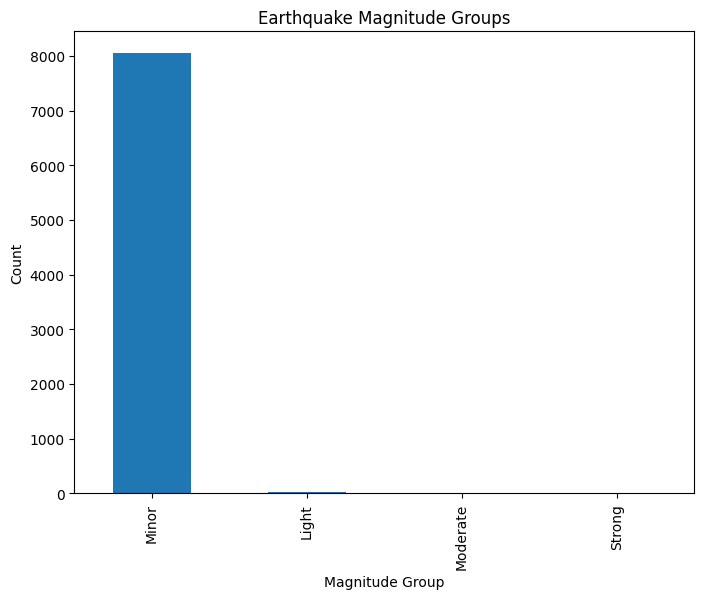

In [24]:
# Büyüklük gruplarını sayma
magnitude_bins = pd.cut(cleaned_data['Magnitude'], bins=[0, 4, 5, 6, 10], labels=['Minor', 'Light', 'Moderate', 'Strong'])
magnitude_counts = magnitude_bins.value_counts()

print("Deprem büyüklük grupları:\n", magnitude_counts)

# Histogram ile görselleştirme
magnitude_counts.plot(kind='bar', title='Earthquake Magnitude Groups', figsize=(8, 6))
plt.xlabel('Magnitude Group')
plt.ylabel('Count')
plt.show()


In [25]:
from sklearn.cluster import KMeans

# K-means clustering için koordinat verisi
coords = cleaned_data[['Latitude', 'Longitude']].dropna()
kmeans = KMeans(n_clusters=5, random_state=0).fit(coords)

# Harita üzerinde kümeleri göster
cluster_map = folium.Map(location=[41.9028, 12.4964], zoom_start=6)

for i, row in coords.iterrows():
    cluster = kmeans.labels_[i]
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=f"C{cluster}",
        fill=True,
        fill_color=f"C{cluster}"
    ).add_to(cluster_map)

# Haritayı kaydet
cluster_map_path = '/content/drive/MyDrive/Colab Notebooks/database/italy_earthquake/italy_earthquake_clusters.html'
cluster_map.save(cluster_map_path)

print(f"Cluster map saved to: {cluster_map_path}")


Cluster map saved to: /content/drive/MyDrive/Colab Notebooks/database/italy_earthquake/italy_earthquake_clusters.html


In [26]:
import pandas as pd
import plotly.express as px

# 1. Veri Yükleme
file_path = 'italy_earthquake.csv'
data = pd.read_csv(file_path)

# 2. Sütunları Düzenleme
if 'Depth/Km' in data.columns:
    data.rename(columns={'Depth/Km': 'Depth'}, inplace=True)
if 'Time' in data.columns:
    data['Time'] = pd.to_datetime(data['Time'], errors='coerce')

# 3. Geçerli Satırları Filtreleme
filtered_data = data.dropna(subset=['Latitude', 'Longitude', 'Depth', 'Magnitude'])

# 4. 3D Harita Oluşturma
fig = px.scatter_3d(
    filtered_data,
    x='Longitude',  # X ekseni
    y='Latitude',   # Y ekseni
    z='Depth',      # Z ekseni
    size='Magnitude',  # Nokta boyutu
    color='Magnitude',  # Nokta rengi
    hover_data={
        'Depth': True,
        'Magnitude': True,
        'Latitude': True,
        'Longitude': True
    },
    title='3D Earthquake Visualization - Italy',
    labels={'Depth': 'Depth (km)', 'Magnitude': 'Magnitude'},
)

# Z ekseninin ters olması (derinliğin negatif olması için)
fig.update_layout(scene=dict(zaxis=dict(autorange="reversed")))

# Haritayı kaydetme
file_path_3d = "/content/drive/MyDrive/Colab Notebooks/database/italy_earthquake/italy_earthquake_3d_map.html"
fig.write_html(file_path_3d)

file_path_3d


'/content/drive/MyDrive/Colab Notebooks/database/italy_earthquake/italy_earthquake_3d_map.html'